# System Properties and Validation Tests

The risk-adjusted bonding curve system requires certain properties to be considered a good estimator of project risk and token price. We also require that it is a fair system, where agents are rewarded according to how accurately they predict the project's future success. 

To validate that these properties are indeed present in the modeled system, we conduct validation tests for the following: <br/>
**1. Convergence of Alpha** <br/>
**2. Convergence of Price** <br/>
**3. Empirically demonstrate correlation of agents' payouts to their beliefs**

Each validation test is a controlled experiment performed in an environment set up to most clearly and obviously reveal the system property or behaviour. 

## 1. Convergence of Alpha

### Introduction
The Prediction Market in the risk-adjusted bonding curve system acts as an estimator for Alpha, the likelihood of project success.

$$ \alpha \in [0,1] $$
where $\alpha = 0$ indicates that the project is estimated to fail, and $\alpha = 1$ indicates the highest likelhood of project success. Refer [Mathematical Model of a Risk-Adjusted Bonding Curve](Math_Specification/System_Specification.ipynb) for context.

### Hypothesis
Alpha converges to a stable value based on agents' positive and negative attestations on project success. 
 
### Experiment set up
We set up a 2-agent system. Each agent is initialized with two extreme private beliefs of Alpha. <br/>
Agent 1's private belief of Alpha = 0.1 <br/>
Agent 2's private belief of Alpha = 0.9

The agents maintain this private belief of Alpha throughout the system execution.

All other agent parameters are initalized as equivalent for both agents. They start out with the same private belief of Price, the same amount of supply tokens, and so on.



### Result

In [ ]:
# import sys
# sys.path.append('../')
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()

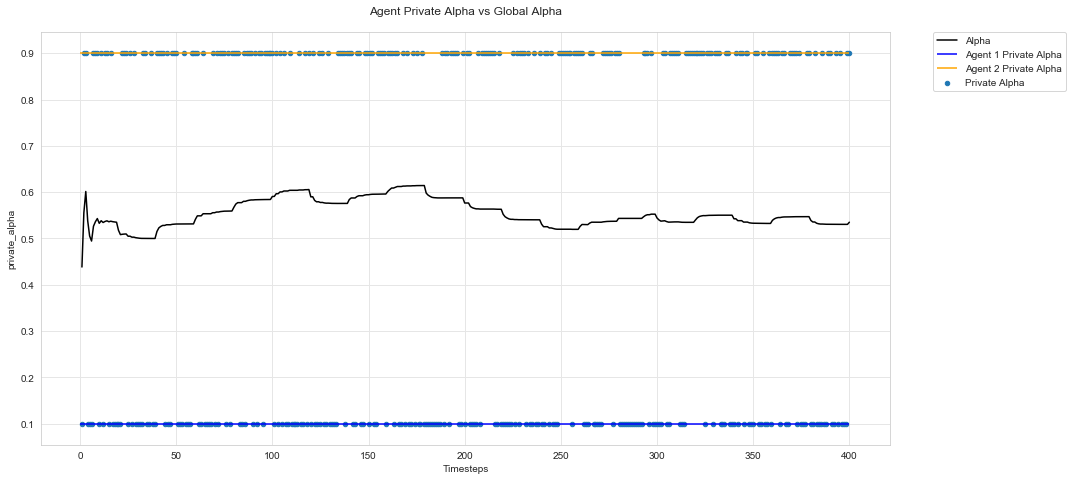

In [2]:
experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
        df = df[df.run == 1]  

# MAKE A FOR LOOP or FUNCTION FOR ALL AGENTS
        chosen_agents = df['chosen_agent'].tolist()
        chosen_agents_private_alphas = []
        for agent in chosen_agents:
            chosen_agents_private_alphas.append(agent['agent_private_alpha'])
        
        df['private_alpha'] = chosen_agents_private_alphas
            
        df['agent_1_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][0]))
        df['agent_2_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][1]))
        

        plot_label = experiment['rules_price']
        ax = axs
        title = 'Agent Private Alpha vs Global Alpha' + '\n' 
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Alpha Value')
        colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]
        
        plt.hlines(y= max(df['agent_1_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 1 Private Alpha',  color = colors[0])
        plt.hlines(y= max(df['agent_2_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 2 Private Alpha',  color = colors[1])

        df.plot(x='timestep', y='private_alpha', label='Private Alpha', ax=ax, legend=True, kind= 'scatter')
        df.plot(x='timestep', y='alpha', label='Alpha', ax=ax, legend=True, color = colors[5])

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

### Inference

Alpha converges as the agents make attestations over time. 

The system responds well to the agents' attestations, incorporating each attestation into the estimation of system Alpha. We conclude that the system is a good estimator of likelihood of project success.

## 2. Convergence of Price

### Introduction
The Bonding Curve in the risk-adjusted bonding curve system acts as an estimator for the Price of the system's supply token.
$$ P = \kappa \frac{R}{S}\space\space\space ; \space\space\space P \in [0,\infty)$$
Refer [Mathematical Model of a Risk-Adjusted Bonding Curve](Math_Specification/System_Specification.ipynb) for context.

### Hypothesis
Price converges to a stable value based on agents' bond actions to obtain supply tokens and burn actions to sell their supply tokens. 
 
### Experiment set up
We set up a 2-agent system. Each agent is initialized with two extreme private beliefs of Price. <br/>
Agent 1's private belief of Price = 0.2 <br/>
Agent 2's private belief of Price = 2

The agents maintain this private belief of Price throughout the system execution.

They start out with the different private beliefs of Alpha. All other variables are equivalent, such as the same amount of supply tokens, and so on.



### Results

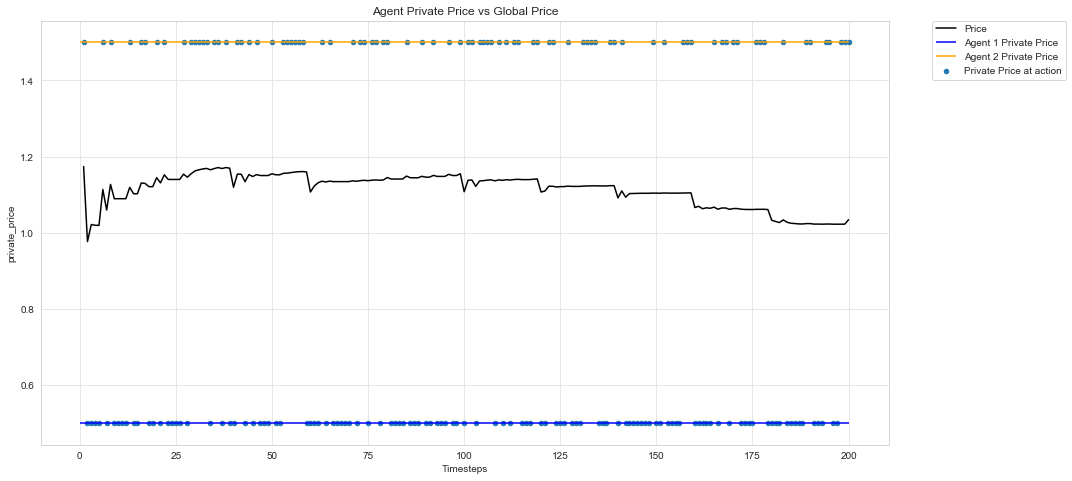

In [2]:
experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
        df = df[df.run == 1]  

# MAKE A FOR LOOP or FUNCTION FOR ALL AGENTS
        chosen_agents = df['chosen_agent'].tolist()
        chosen_agents_private_prices = []
        for agent in chosen_agents:
            chosen_agents_private_prices.append(agent['agent_private_price'])
        
        df['private_price'] = chosen_agents_private_prices
            
        df['agent_1_private_price'] = df.agents.apply(lambda x: np.array(x['agent_private_price'][0]))
        df['agent_2_private_price'] = df.agents.apply(lambda x: np.array(x['agent_private_price'][1]))
        

        plot_label = experiment['rules_price']
        ax = axs
        title = 'Agent Private Price vs Global Price' 
        # + '\n' + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Price')
        colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]
        
        plt.hlines(y= max(df['agent_1_private_price']), xmin=0, xmax=max(df.timestep), label = 'Agent 1 Private Price',  color = colors[0])
        plt.hlines(y= max(df['agent_2_private_price']), xmin=0, xmax=max(df.timestep), label = 'Agent 2 Private Price',  color = colors[1])

        df.plot(x='timestep', y='private_price', label='Private Price at action', ax=ax, legend=True, kind= 'scatter')
        df.plot(x='timestep', y='spot_price', label='Price', ax=ax, legend=True, color = colors[5])

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

### Inference 

Price converges as the agents bond and burn tokens over time. 

The system responds well to the agents' bond and burn actions, incorporating each action into the estimation of system Price. We conclude that the system is a good estimator of the token price.

The plots below show how system Reserve and system Supply change as agents bond or burn tokens.

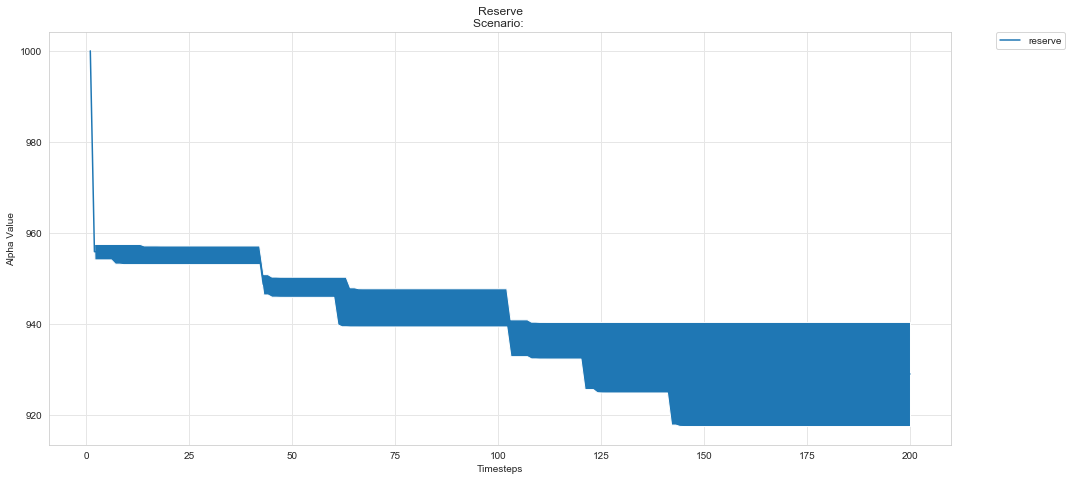

In [5]:
experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0
# config_labels = ['RULE 1,'RULE 2']


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
#         df = df[df.run == 1]  
        
        df = df.groupby('timestep').agg({'reserve': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['rules_price']
        ax = axs
        title = 'Reserve' + '\n' + 'Scenario: ' 
        #+ str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Alpha Value')
        colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]

        ax.plot(df.timestep, df[('reserve','mean')],label='reserve') 

        ax.fill_between(df.timestep, df[('reserve','min')], df[('reserve','max')])#, supply=0.3) 

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

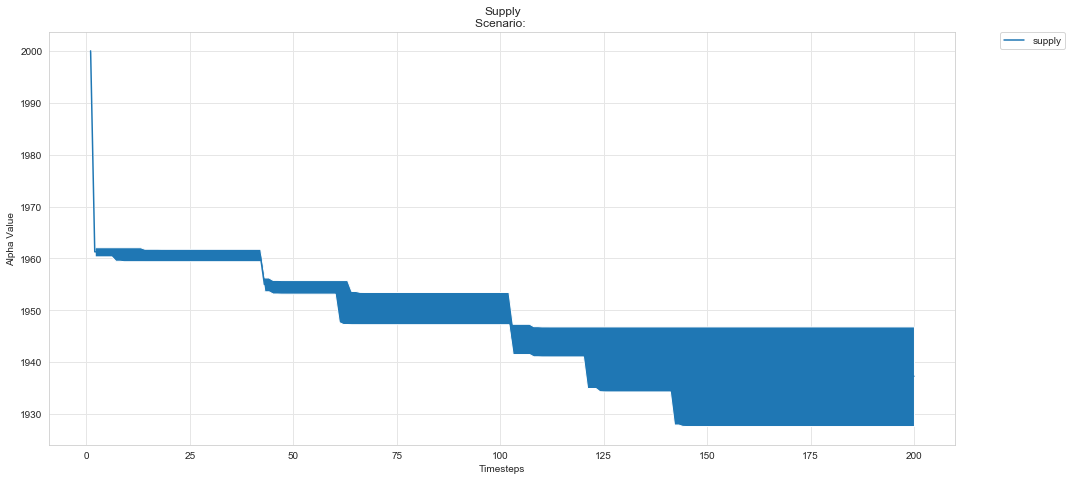

In [4]:
experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0
# config_labels = ['RULE 1,'RULE 2']


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
#         df = df[df.run == 1]  
        
        df = df.groupby('timestep').agg({'supply': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['rules_price']
        ax = axs
        title = 'Supply' + '\n' + 'Scenario: ' 
        #+ str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Alpha Value')
        colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]

        ax.plot(df.timestep, df[('supply','mean')],label='supply') 

        ax.fill_between(df.timestep, df[('supply','min')], df[('supply','max')])#, supply=0.3) 

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()


## 3. Correlation of agents' payouts to their beliefs

### Introduction
Agents take actions based on their private beilef of Alpha and Price. If they believe Alpha is higher than the current system Alpha, then they will make a positive attestation and vice versa. Likewise, if an agent believes the price to be higher than the current system price, they will make a bond action and vice versa.
For more information on agent behaviour heuristics, see [AgentBehaviourModel - Heuristic](!!!! INSERT LINK !!!!!)

Agents participate in the prediction market motivated by the ability to increase their final payout once the bond has completed its execution. An agent with $n$ supply tokens can choose to keep the tokens as is (as $s_{free}$), or use them to make positive attestations ($s_1$) or negative attestations ($s_0$) in the hope of increasing their expected future payout.

The payout $\Theta_a$ of an agent comprises of their share of payout corresponding to their holdings of $s_{free}$, $s_1$ and $s_0$. 
$$\Theta_a = \frac{s_{free}}{s} (\alpha_t C+R) + \alpha_t \frac{q_1}{Q_1} \frac{s_1}{s} (C+R) + (1-\alpha_t) \frac{q_0}{Q_0} \frac{s_0}{s} (R)$$

### Hypothesis
The agent that has the closest prediction of final system Alpha - i.e. their private belief of Alpha - obtains the largest final payout.
 
### Experiment set up
We set up a 21-agent system. Each agent is initialized with equidistant private beliefs of Alpha. <br/>
Agent 1's private belief of Alpha = 0.00 <br/>
Agent 2's private belief of Alpha = 0.05 <br/>
Agent 3's private belief of Alpha = 0.10 <br/>
. . . <br/>
Agent 21's private belief of Alpha = 1.0 <br/>

All agents have the same private belief of Price, which remains constant throughout the system execution.

Other agent parameters are initialized equally for all agents. They start out with the same reserve as well as same amount of supply tokens in all pools, with initial values as the following:


| Agent Variable Name -> | agent_attestations_1 | agent_attestations_0 | agent_reserve | agent_supply_1 | agent_supply_0 | agent_supply_free |
|:-----------------------|:--------------------:|:--------------------:|:--------------------:|:--------------------:|:--------------------:|:-------------:|
|Brief Description ->    | Claim on Pos. Attest. | Claim on Neg. Attest. | Reserve funds | Pos. Attest Tokens |  Neg. Attest Tokens  |  Unattested Tokens  |
|Initial Value ->        | 0  | 0 | 100   | 3 | 3 | 44 |




### Results

#### Agents vs their Positive Attestations
#### The table below is a snapshot at one timeslice during the simulation of the all of the agents current positions. We observe that agents with low beliefs of alpha have attested negatively (agent_attestations_0). Agents with alpha beliefs closer to 1 have only attested positively (agent_attestations_1). Importantly, agents within the range of alphas and their own threshold values during the simulation (alpha = 0.5 and 0.55) have attested both positively and negatively.
 


In [2]:
t = 1601

experiments.dataset[0].agents[t]

,id,agent_attestations_1,agent_attestations_0,agent_reserve,agent_supply_1,agent_supply_0,agent_supply_free,agent_private_alpha,agent_private_price
0,0.0,0.000000,0.193324,100.0,3.000000,40.853048,6.146952,0.00,1.5
1,1.0,0.000000,0.226022,100.0,3.000000,46.800712,10.199288,0.05,1.5
2,2.0,0.000000,0.251948,100.0,3.000000,50.759037,6.240963,0.10,1.5
3,3.0,0.000000,0.237487,100.0,3.000000,48.163548,8.836452,0.15,1.5
4,4.0,0.000000,0.174215,100.0,3.000000,36.743598,10.256402,0.20,1.5
5,5.0,0.000000,0.166802,100.0,3.000000,34.840780,12.159220,0.25,1.5
6,6.0,0.000000,0.170147,100.0,3.000000,35.951315,11.048685,0.30,1.5
7,7.0,0.000000,0.117718,100.0,3.000000,24.826067,22.173933,0.35,1.5
8,8.0,0.000000,0.146639,100.0,3.000000,31.319777,15.680223,0.40,1.5
9,9.0,0.000000,0.101524,100.0,3.000000,22.610701,24.389299,0.45,1.5


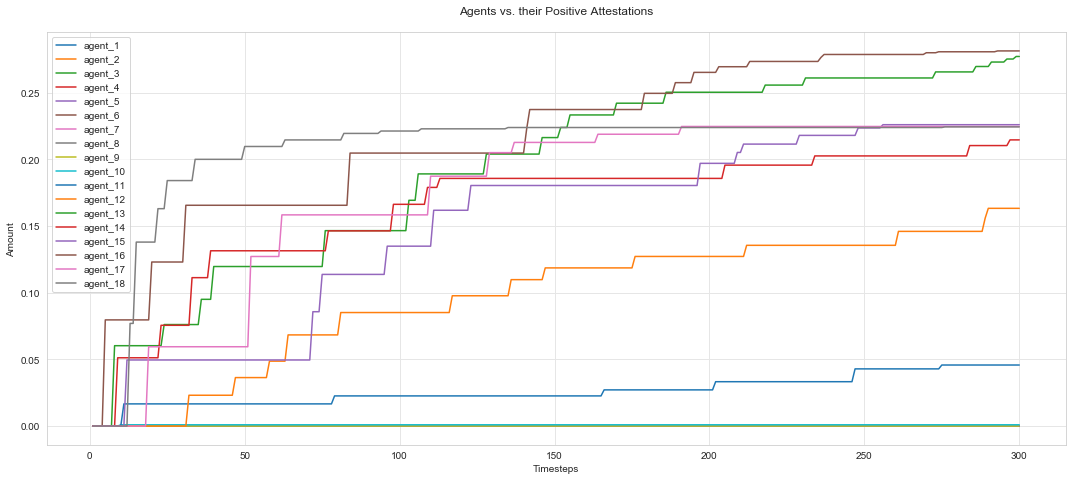

In [3]:
experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0
# config_labels = ['RULE 1,'RULE 2']


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
        df = df[df.run == 1]  
        

# MAKE A FOR LOOP or FUNCTION FOR ALL AGENTS
        df['agent_1_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][0]))
        df['agent_2_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][1]))
        df['agent_3_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][2]))
        df['agent_4_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][3]))
        df['agent_5_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][4]))
        df['agent_6_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][5]))
        df['agent_7_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][6]))
        df['agent_8_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][7]))
        df['agent_9_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][8]))
        df['agent_10_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][9]))
        df['agent_11_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][10]))
        df['agent_12_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][11]))
        df['agent_13_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][12]))
        df['agent_14_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][13]))
        df['agent_15_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][14]))
        df['agent_16_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][15]))
        df['agent_17_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][16]))
        df['agent_18_attest_1'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][17]))

        plot_label = experiment['rules_price']
        ax = axs
        title = 'Agents vs. their Positive Attestations' + '\n' 
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Amount')
        colors = ['b','orange', 'g', 'magenta', 'r']

        df.plot(x='timestep', y='agent_1_attest_1', label='agent_1', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_2_attest_1', label='agent_2', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_3_attest_1', label='agent_3', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_4_attest_1', label='agent_4', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_5_attest_1', label='agent_5', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_6_attest_1', label='agent_6', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_7_attest_1', label='agent_7', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_8_attest_1', label='agent_8', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_9_attest_1', label='agent_9', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_10_attest_1', label='agent_10', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_11_attest_1', label='agent_11', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_12_attest_1', label='agent_12', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_13_attest_1', label='agent_13', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_14_attest_1', label='agent_14', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_15_attest_1', label='agent_15', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_16_attest_1', label='agent_16', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_17_attest_1', label='agent_17', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_18_attest_1', label='agent_18', ax=ax, legend=True)

        ax.legend()

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()
#plt.title("AGENTS VS THEIR POSITIVE ATTESTATIONS")


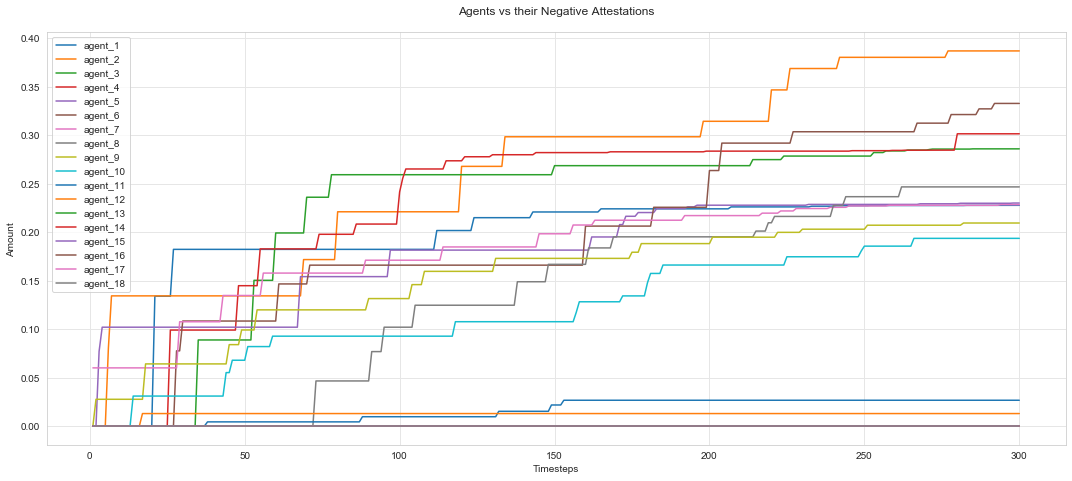

In [4]:
experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0
# config_labels = ['RULE 1,'RULE 2']


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
        df = df[df.run == 1]  
        

# MAKE A FOR LOOP or FUNCTION FOR ALL AGENTS
        df['agent_1_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][0]))
        df['agent_2_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][1]))
        df['agent_3_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][2]))
        df['agent_4_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][3]))
        df['agent_5_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][4]))
        df['agent_6_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][5]))
        df['agent_7_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][6]))
        df['agent_8_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][7]))
        df['agent_9_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][8]))
        df['agent_10_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][9]))
        df['agent_11_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][10]))
        df['agent_12_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][11]))
        df['agent_13_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][12]))
        df['agent_14_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][13]))
        df['agent_15_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][14]))
        df['agent_16_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][15]))
        df['agent_17_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][16]))
        df['agent_18_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][17]))

        plot_label = experiment['rules_price']
        ax = axs
        title = 'Agents vs their Negative Attestations' + '\n' 
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Amount')
        colors = ['b','orange', 'g', 'magenta', 'r']
        

        df.plot(x='timestep', y='agent_1_attest_0', label='agent_1', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_2_attest_0', label='agent_2', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_3_attest_0', label='agent_3', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_4_attest_0', label='agent_4', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_5_attest_0', label='agent_5', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_6_attest_0', label='agent_6', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_7_attest_0', label='agent_7', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_8_attest_0', label='agent_8', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_9_attest_0', label='agent_9', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_10_attest_0', label='agent_10', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_11_attest_0', label='agent_11', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_12_attest_0', label='agent_12', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_13_attest_0', label='agent_13', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_14_attest_0', label='agent_14', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_15_attest_0', label='agent_15', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_16_attest_0', label='agent_16', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_17_attest_0', label='agent_17', ax=ax, legend=True)
        df.plot(x='timestep', y='agent_18_attest_0', label='agent_18', ax=ax, legend=True)

        ax.legend()

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()


#### Agents' Belief of Alpha vs their Payout

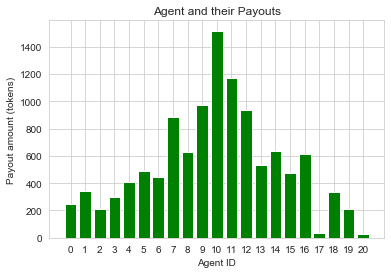

In [25]:
import matplotlib.pyplot as plt

S_free = experiments.dataset[0].supply_free[t]
S_0 = experiments.dataset[0].supply_0[t]
S_1 = experiments.dataset[0].supply_1[t]

agents_id = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
payout_list = []

for a in agents_id:
    #print(a)
    q1 = experiments.dataset[0].agents[t].agent_attestations_1[a]
    q0 = experiments.dataset[0].agents[t].agent_attestations_0[a]
    
    s_free = experiments.dataset[0].agents[t].agent_supply_free[a]
    s1 = experiments.dataset[0].agents[t].agent_supply_1[a]
    s0 = experiments.dataset[0].agents[t].agent_supply_0[a]
    s = s_free + s1 + s0
    
    agent_private_alpha = experiments.dataset[0].agents[t].agent_private_alpha[a]

    Q0 = experiments.dataset[0].attestations_0[t]
    Q1 = experiments.dataset[0].attestations_1[t]

    R = experiments.dataset[0].reserve[t]
    S = experiments.dataset[0].supply[t]

    C = experiments.C
    alpha = experiments.dataset[0].alpha[t]

    T1 = (s_free/s)*(alpha*C + R)
    T2 = (s1/s)*(q1/Q1)*alpha*(C+R)
    T3 = (s0/s)*(q0/Q0)*(1-alpha)*(R)

    agent_payout = T1+T2+T3
    payout_list.append(agent_payout)
    #print(a, "'s Payout = ", agent_payout, "| Private Alpha = ", agent_private_alpha)

#plt.plot(payout_list)

arr2d = np.array(payout_list)

arr1d = arr2d.flatten()

x = agents_id
payouts = arr1d

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, payouts, color='green')
plt.xlabel("Agent ID")
plt.ylabel("Payout amount (tokens)")
plt.title("Agent and their Payouts")

plt.xticks(x_pos, x)

plt.show()

It appears that Agent 10 has the highest payout. <br>

We know that Agent 10's private belief of Alpha is 0.50. To verify if this is close to the final system Alpha, we plot Alpha. 

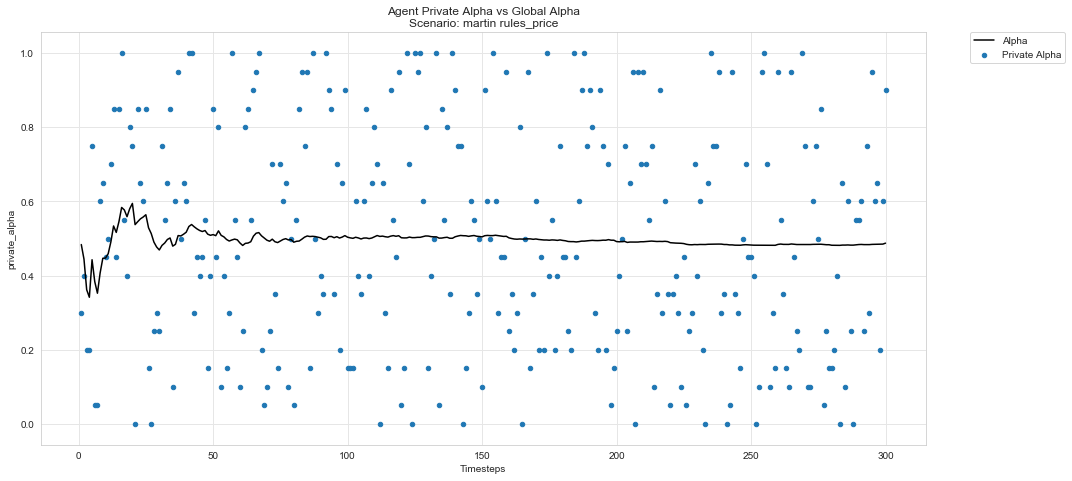

In [7]:
experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
        df = df[df.run == 1]  

# MAKE A FOR LOOP or FUNCTION FOR ALL AGENTS
        chosen_agents = df['chosen_agent'].tolist()
        chosen_agents_private_alphas = []
        for agent in chosen_agents:
            chosen_agents_private_alphas.append(agent['agent_private_alpha'])
        
        df['private_alpha'] = chosen_agents_private_alphas
            
        df['agent_1_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][0]))
        df['agent_2_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][1]))
        

        plot_label = experiment['rules_price']
        ax = axs
        title = 'Agent Private Alpha vs Global Alpha' 
        # + '\n' + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Alpha Value')
        colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]
        
        #plt.hlines(y= max(df['agent_1_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 1 Private Alpha',  color = colors[0])
        #plt.hlines(y= max(df['agent_2_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 2 Private Alpha',  color = colors[1])

        df.plot(x='timestep', y='private_alpha', label='Private Alpha', ax=ax, legend=True, kind= 'scatter')
        df.plot(x='timestep', y='alpha', label='Alpha', ax=ax, legend=True, color = colors[5])

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

In [8]:
experiments.dataset[0].alpha[t]

0.49770171279341924

The system's final Alpha is 0.4977. <br/>
Agent 10 with alpha belief 0.50 has the higest payout. 

Notice that jaggedness of the agent payout surface. It's not necessarily true that an agent with the closer belief of Alpha *always* and *strictly* gets a higher payout.

Consider Agent 17 with a Alpha belief of 0.85 and a payout of 33.94. 
$$\hat\alpha_{17} = 0.85$$
$$\Theta_{17} = 33.94$$
Agent 18 with an Alpha belief 0.9 - which is farther away from the final system Alpha -  obtained a much larger payout of 334.86.  
$$\hat\alpha_{18} = 0.90$$
$$\Theta_{18} = 334.86$$

This could be explained due to a possible large action that either agent took early on in the system when system Alpha was quite volatile. If said large action was in the right direction towards final system Alpha, this move acted in their advantage. If it was in the wrong direction to system Alpha, this resulted in their disadvantage. 

In this case, Agent 18 placed a risky bet towards the correct direction of system Alpha very early on. 

This indicates that the process has path dependence. This is a system property by design.



### Inference
The agent with the highest payout has an alpha belief of 0.50, which is close to the final system Alpha. We conclude that the agent with the closest prediction of Alpha generally obtains the largest final payout.  